In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
from matplotlib.pyplot import *

def get_bouts(vox_times, ivi_thresh = 2, bout_length_thresh = 5):
    """
    Parameters: dt_start: ndarray
                        Array of vocalization times (s) since the start of the recording.
                ivi_thresh: int
                        Threshold for inter-vocalization-interval in seconds.
                bout_length_thresh: int
                        Threshold for number of vocalizations per bout.
    Returns:    bouts: Nx2 np.array
                        Bout onset (column 1)/offset (columns 2) indicies of vox_times, filtered by ISI and bout length.
                
    """
    #inter-vocalization-interval: how many seconds before me was a vocalization?
    ivi = np.insert(np.diff(vox_times), 0, 0) # add a 0 at the beginning to account for the array shortening
    
    #get onsets and offsets times (s) of vocalization bouts with IVIs < ivi_thresh
    onsets = np.where(np.insert(np.diff((ivi < ivi_thresh).astype('int')), 0, 1) == 1)[0]
    offsets = np.where(np.insert(np.diff((ivi < ivi_thresh).astype('int')), 0, 1) == -1)[0]-1
    onsets = onsets[:len(offsets)] #match onset/offset sizes
    
    #inclusive of t-1 and vocalizations in sequence
    bout_onsets = onsets[np.where(offsets-onsets > bout_length_thresh)[0]] - 1 
    bout_offsets = offsets[np.where(offsets-onsets > bout_length_thresh)[0]]
    
    bouts = np.array([bout_onsets, bout_offsets]).T
    
    return bouts

%matplotlib inline

In [2]:
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('talk')

In [3]:
df = pd.read_feather('vocalization_df.feather')

df_c2 = df[df.cohort == 'c2']
df_c4 = df[df.cohort == 'c4']
df_c5 = df[df.cohort == 'c5']

# circadian 

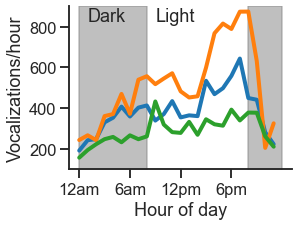

In [4]:
figure(figsize=(4,3))


plot(df_c2.groupby('hour_of_day').size().values/df_c2.date.nunique(),
     linewidth=4)
plot(df_c4.groupby('hour_of_day').size().values/df_c4.date.nunique(),
     linewidth=4)
plot(df_c5.groupby('hour_of_day').size().values/df_c5.date.nunique(),
     linewidth=4)

ylabel('Vocalizations/hour')
xlabel('Hour of day')


xticks([0,6,12,18],('12am', '6am', '12pm', '6pm'))
fill_between([0,8],[900, 900], color='gray', alpha=0.5)
fill_between([20,24],[900, 900], color='gray', alpha=0.5)
ylim(100,900)
yticks([200, 400, 600, 800])
text(1, 825, 'Dark')
text(9, 825, 'Light')

sns.despine()
# savefig('vocalizations_diurnal_new_small.svg')

# bouts

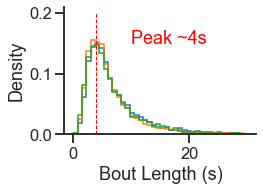

In [5]:
figure(figsize=(4,3))

_bins = 40
range_low, range_high = 0, 30

bouts_c2 = get_bouts(df_c2.dt_start, ivi_thresh=2, bout_length_thresh=5)
bouts_c4 = get_bouts(df_c4.dt_start, ivi_thresh=2, bout_length_thresh=5)
bouts_c5 = get_bouts(df_c5.dt_start, ivi_thresh=2, bout_length_thresh=5)

hist(df_c2.dt_start.values[bouts_c2[:,1]]-df_c2.dt_start.values[bouts_c2[:,0]], 
     bins=_bins, histtype='step', density=True, range=(range_low, range_high));

hist(df_c4.dt_start.values[bouts_c4[:,1]]-df_c4.dt_start.values[bouts_c4[:,0]], 
     bins=_bins, histtype='step', density=True, range=(range_low, range_high));

hist(df_c5.dt_start.values[bouts_c5[:,1]]-df_c5.dt_start.values[bouts_c5[:,0]], 
     bins=_bins, histtype='step', density=True, range=(range_low, range_high));

vlines(4, 0, 0.2, color='r', linestyle='--', linewidth=1)
ylabel('Density')
xlabel('Bout Length (s)')
text(10, 0.15, 'Peak ~4s', color='r')
sns.despine()
tight_layout()
# savefig('bout_duration_distribution.svg', dpi=300)

# inter-vocalization-interval 

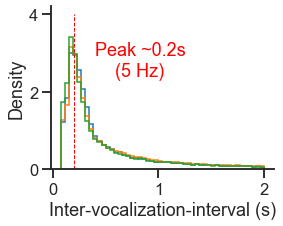

In [6]:
figure(figsize=(4,3))

_bins=50
range_low, range_high = 0.075, 2

hist(np.diff(df_c2.dt_start), bins=_bins, histtype='step', 
     density=True, range=(range_low, range_high));
hist(np.diff(df_c4.dt_start), bins=_bins, histtype='step', 
     density=True, range=(range_low, range_high));
hist(np.diff(df_c5.dt_start), bins=_bins, histtype='step', 
     density=True, range=(range_low, range_high));

vlines(0.2, 0, 4, color='r', linestyle='--', linewidth=1)

text(.4, 2.4, 'Peak ~0.2s \n    (5 Hz)', color='r')

ylabel('Density')
xlabel('Inter-vocalization-interval (s)')
sns.despine()
# tight_layout()
# savefig('/ivi_distribution.svg', dpi=300)

# all 

Text(0.1, 15, 'Peak ~0.04s')

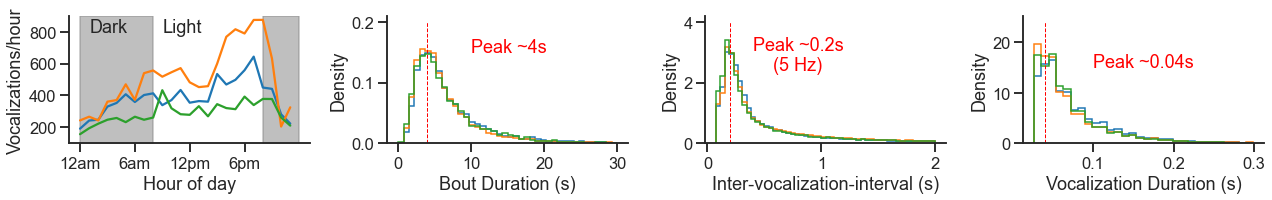

In [7]:
figure(figsize=(18,3))

subplot(1,4,1)
plot(df_c2.groupby('hour_of_day').size().values/df_c2.date.nunique())
plot(df_c4.groupby('hour_of_day').size().values/df_c4.date.nunique())
plot(df_c5.groupby('hour_of_day').size().values/df_c5.date.nunique())

ylabel('Vocalizations/hour')
xlabel('Hour of day')


xticks([0,6,12,18],('12am', '6am', '12pm', '6pm'))
fill_between([0,8],[900, 900], color='gray', alpha=0.5)
fill_between([20,24],[900, 900], color='gray', alpha=0.5)
ylim(100,900)
yticks([200, 400, 600, 800])
text(1, 800, 'Dark')
text(9, 800, 'Light')
sns.despine()

subplot(1,4,2)
_bins = 40
range_low, range_high = 0, 30

bouts_c2 = get_bouts(df_c2.dt_start, ivi_thresh=2, bout_length_thresh=5)
bouts_c4 = get_bouts(df_c4.dt_start, ivi_thresh=2, bout_length_thresh=5)
bouts_c5 = get_bouts(df_c5.dt_start, ivi_thresh=2, bout_length_thresh=5)

hist(df_c2.dt_start.values[bouts_c2[:,1]]-df_c2.dt_start.values[bouts_c2[:,0]], 
     bins=_bins, histtype='step', density=True, range=(range_low, range_high));

hist(df_c4.dt_start.values[bouts_c4[:,1]]-df_c4.dt_start.values[bouts_c4[:,0]], 
     bins=_bins, histtype='step', density=True, range=(range_low, range_high));

hist(df_c5.dt_start.values[bouts_c5[:,1]]-df_c5.dt_start.values[bouts_c5[:,0]], 
     bins=_bins, histtype='step', density=True, range=(range_low, range_high));

vlines(4, 0, 0.2, color='r', linestyle='--', linewidth=1)
ylabel('Density')
xlabel('Bout Duration (s)')
text(10, 0.15, 'Peak ~4s', color='r')
sns.despine()
tight_layout()

subplot(1,4,3)
_bins=50
range_low, range_high = 0.075, 2

hist(np.diff(df_c2.dt_start), bins=_bins, histtype='step', 
     density=True, range=(range_low, range_high));
hist(np.diff(df_c4.dt_start), bins=_bins, histtype='step', 
     density=True, range=(range_low, range_high));
hist(np.diff(df_c5.dt_start), bins=_bins, histtype='step', 
     density=True, range=(range_low, range_high));


vlines(0.2, 0, 4, color='r', linestyle='--', linewidth=1)


text(.4, 2.4, 'Peak ~0.2s \n    (5 Hz)', color='r')

ylabel('Density')
xlabel('Inter-vocalization-interval (s)')
sns.despine()

subplot(1,4,4)
hist(df_c2.offset - df_c2.onset, histtype='step', bins=30, density=True);
hist(df_c4.offset - df_c4.onset, histtype='step', bins=30, density=True);
hist(df_c5.offset - df_c5.onset, histtype='step', bins=30, density=True);
sns.despine()
ylabel('Density')
xlabel('Vocalization Duration (s)')
vlines(0.04, 0, 24, color='r', linestyle='--', linewidth=1)
text(.1, 15, 'Peak ~0.04s', color='r')

# savefig('first_row_figure4.svg')